# Scraping Books

## Python reminder

### Numeric Types

In [2]:
type(42)

int

In [3]:
type(3.14)


float

In [4]:
4 + 9.5


13.5

In [5]:
abs(-5)


5

### Booleans

In [7]:
type(True) # or type(False)


bool

In [10]:
True and False

False

In [11]:
True or False

True

In [12]:
not True

False

### Comparisons

In [13]:
5 < 3 # Strictly less than

False

In [14]:
4 <= 4 # Less than or equal

True

In [15]:
"boris" == "seb" # equal, note the `double` =

False

In [16]:
"boris" != "seb" # not equal

True

### Text Sequence Type (Strings, str)

In [17]:
"boris"

'boris'

In [18]:
"boris".capitalize()

'Boris'

In [19]:
capitalize("boris")

NameError: name 'capitalize' is not defined

In [23]:
"   boris ".rstrip()

'   boris'

In [24]:
"   boris ".lstrip()

'boris '

In [25]:
"   boris ".strip()

'boris'

In [26]:
type(int("42"))

int

## Advanced Data Structure

## List

In [27]:
["apple", "cherries", "banana"]

['apple', 'cherries', 'banana']

In [28]:
len(["apple", "cherries", "banana"])

3

In [29]:
"banana" in ["apple", "cherries", "banana"]

True

### Dict 

In [30]:
{'city': 'Paris', 'population': 2_141_000}

{'city': 'Paris', 'population': 2141000}

In [31]:
len({'city': 'Paris', 'population': 2_141_000})

2

In [32]:
'city' in {'city': 'Paris', 'population': 2_141_000}

True

### Variables

In [34]:
name = 'John' # Assignment
print(name)

John


In [35]:
name = 'Paul' # Re-assignment
print(name)

Paul


In [36]:
first_name = 'John'
last_name = 'Lennon'

In [37]:
full_name = first_name + last_name 
print(full_name)

JohnLennon


### Interpolation

In [38]:
sentence = f'Hi, my name is {first_name} {last_name}'
print(sentence)

Hi, my name is John Lennon


### list operations

In [39]:
# Indexes:    0       1       2
beatles = ['john', 'paul', 'ringo']

In [40]:
beatles[0] # Read

'john'

In [41]:
beatles.append('george') # Create (in place)
print(beatles)

['john', 'paul', 'ringo', 'george']


In [42]:
beatles[1] = 'Paul' # Update (in place)
print(beatles)

['john', 'Paul', 'ringo', 'george']


### dict operations

In [43]:
instruments = {'john':'guitar', 'paul':'bass'} # Keys are `str`, Values too

In [44]:
instruments['john'] # Read

'guitar'

In [45]:
instruments['ringo'] = 'drums' # Create / Update
print(instruments)

{'john': 'guitar', 'paul': 'bass', 'ringo': 'drums'}


In [46]:
del instruments['john']
instruments

{'paul': 'bass', 'ringo': 'drums'}

In [47]:
instruments['john']

KeyError: 'john'

In [49]:
print(instruments.get('john'))

None


In [50]:
instruments.get('john', 'Default instrument')

'Default instrument'

## Control Flow

### if statement

In [51]:
age = int(input("How old are you?"))

if age >= 21:
    print("You can become president")
elif age >= 18:
    print("You can vote")
else:
    print("Be patient!")

How old are you? 18


You can vote


### for statement (on a list)

In [52]:
words = ['cat', 'wolf', 'beetle']
for word in words:
    print(word.upper())

CAT
WOLF
BEETLE


### for statement (on a dict)

In [54]:
instruments

{'paul': 'bass', 'ringo': 'drums'}

In [61]:
instruments.keys()

dict_keys(['paul', 'ringo'])

In [62]:
instruments.values()

dict_values(['bass', 'drums'])

In [63]:
instruments.items()

dict_items([('paul', 'bass'), ('ringo', 'drums')])

In [55]:
for beatle, instrument in instruments.items():
    print(f'{beatle.capitalize()} plays the {instrument}')

Paul plays the bass
Ringo plays the drums


### while loop

In [64]:
i = 1
while i <= 4:
    print(i)
    i = i + 1

1
2
3
4


## Functions

In [65]:
def is_even(number):
    return number % 2 == 0


In [66]:
result = is_even(42)
print(result)

True


# Lets Scrape !

### Lets imports librairies to help us scrap !

In [12]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
response = requests.get("https://books.toscrape.com/index.html")

#### Understand the request/response

In [13]:
response.status_code

200

In [14]:
response.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

#### Parse it with BS4

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

### Lets explore the soup a bit 

In [7]:
soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [8]:
soup.find('title')

<title>
    All products | Books to Scrape - Sandbox
</title>

In [9]:
soup.title.string

'\n    All products | Books to Scrape - Sandbox\n'

In [10]:
soup.title.text

'\n    All products | Books to Scrape - Sandbox\n'

In [11]:
soup.title.string.strip()

'All products | Books to Scrape - Sandbox'

In [17]:
soup.body.h1

<h1>All products</h1>

First book title : 

In [19]:
soup.article.h3.a

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [20]:
soup.article.h3.a.text

'A Light in the ...'

In [21]:
##### but the text is cut !!!

In [22]:
soup.article.h3.a["title"]

'A Light in the Attic'

In [23]:
type(soup.article.h3.a["title"])

str

#### Explore all books in the same time : 

In [24]:
books = soup.find_all("article", class_ = "product_pod")

In [26]:
for book in books:
    print(book.h3.a["title"])

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [29]:
#### Lets explore more

In [30]:
soup.select("div")[0]

<div class="page_inner">
<div class="row">
<div class="col-sm-8 h1"><a href="index.html">Books to Scrape</a><small> We love being scraped!</small>
</div>
</div>
</div>

In [31]:
soup.select(".product_price")

[<div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">£53.74</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">£50.10</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>,
 <div class="product_price">
 <p class="price_color">£47.82</p>
 <p class="instock availability">
 <i class="icon-o

In [34]:
len(soup.select(".product_price"))

20

In [35]:
len(books)

20

#### Lets scrape books info and make it a dataframe

In [37]:
titles = []

In [38]:
ratings = []

In [39]:
prices = []

In [52]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
ratings = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

In [40]:
books = soup.find_all("article", class_ = "product_pod")

In [41]:
books[0].find(class_ = "price_color").string.strip('£')

'51.77'

In [45]:
books[0].find(class_ = "star-rating").attrs['class'][1]

'Three'

In [ ]:
for book in books:
    # Find the title and price
    title.append(book.h3.a["title"])
    prices.append(float(book.find(class_ = "price_color").string.strip('£')))

    # Find the star rating and user the mapping to convert it to numbers
    stars_html = book.find(class_ = "star-rating")
    ratings.append(ratings.get(stars_html.attrs['class'][1], 0))

In [53]:
for book_html in soup.find_all(class_ = "product_pod"):
        # Find the title and price
        books_dict['Title'].append(book_html.find("h3").find("a").string)
        books_dict['Price'].append(float(book_html.find(class_ = "price_color").string.strip('£')))
        
        # Find the star rating and user the mapping to convert it to numbers
        stars_html = book_html.find(class_ = "star-rating")
        books_dict['Rating'].append(ratings.get(stars_html.attrs['class'][1], 0))

In [54]:
pd.DataFrame.from_dict(books_dict)

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets ...,33.34,4
7,The Coming Woman: A ...,17.93,3
8,The Boys in the ...,22.60,4
9,The Black Maria,52.15,1


In [55]:
tableau = pd.DataFrame.from_dict(books_dict)

In [57]:
tableau.head()

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5


In [58]:
tableau.head(10)

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets ...,33.34,4
7,The Coming Woman: A ...,17.93,3
8,The Boys in the ...,22.60,4
9,The Black Maria,52.15,1


In [59]:
tableau.tail(10)

,Title,Price,Rating
10,Starving Hearts (Triangular Trade ...,13.99,2
11,Shakespeare's Sonnets,20.66,4
12,Set Me Free,17.46,5
13,Scott Pilgrim's Precious Little ...,52.29,5
14,Rip it Up and ...,35.02,5
15,Our Band Could Be ...,57.25,3
16,Olio,23.88,1
17,Mesaerion: The Best Science ...,37.59,1
18,Libertarianism for Beginners,51.33,2
19,It's Only the Himalayas,45.17,2


<AxesSubplot:>

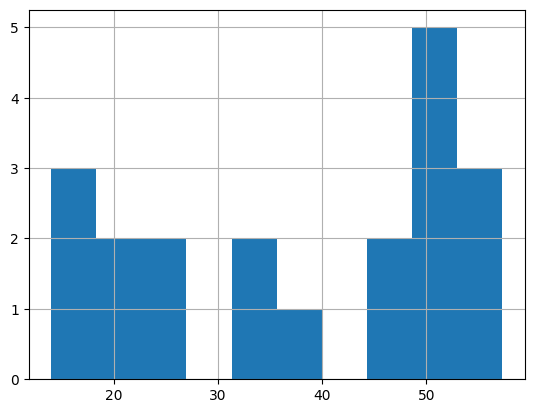

In [60]:
tableau['Price'].hist()

<AxesSubplot:xlabel='Rating'>

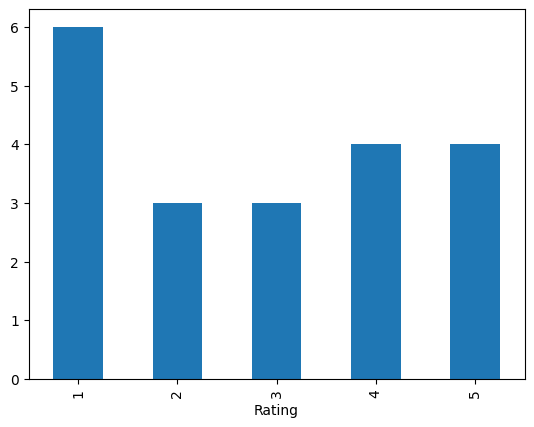

In [62]:
tableau.groupby("Rating").count()["Title"].plot(kind="bar")

In [63]:
tableau.to_csv("books.csv")